## Exercise 1 -- calculating odds ratios, probabilities and so on

We looked at this exercise first so that we could get a sense of what odds are like, and what log odds are like.

- probability: a number between 0 and 1
- odds: a number between 0 and infinity
- log odds: a number between negative infinity and positive infinity

In [1]:
deck_size = 52.0

In [2]:
two_of_clubs = 1.0 / deck_size
two_of_clubs

0.019230769230769232

In [3]:
odds_of_two_of_clubs = two_of_clubs / (1 - two_of_clubs)
odds_of_two_of_clubs

0.019607843137254905

In [4]:
import math

In [5]:
log_odds_of_two_of_clubs = math.log(odds_of_two_of_clubs)
log_odds_of_two_of_clubs

-3.9318256327243257

In [6]:
any_diamond = 13.0 / 52.0
any_diamond

0.25

In [7]:
odds_of_any_diamond = any_diamond / (1 - any_diamond)
odds_of_any_diamond

0.3333333333333333

In [8]:
log_odds_of_any_diamond = math.log(odds_of_any_diamond)
log_odds_of_any_diamond

-1.0986122886681098

In [9]:
any_face = 3 * 4 / deck_size
any_face

0.23076923076923078

In [10]:
odds_of_a_face = any_face / (1 - any_face)
odds_of_a_face

0.30000000000000004

In [11]:
log_odds_of_a_face = math.log(odds_of_a_face)
log_odds_of_a_face

-1.203972804325936

In [12]:
not_a_face = 1 - any_face

In [13]:
odds_of_not_a_face = not_a_face / (1 - not_a_face)
odds_of_not_a_face

3.333333333333332

In [14]:
math.log(odds_of_not_a_face)

1.2039728043259357

# Logistic regression for Titanic

Logistic regression is actually a classifier. We create a linear model to predict the logodds of something being true.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.linear_model

In [16]:
titanic = pd.read_csv("../../optional/decision-trees/data/titanic.csv", index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Logistic regression works well enough even when you give it binary features as inputs.

Generally speaking, useless features ("does the person have a T in their name") will end up with very small
coefficients.

"Does the person have an S in their name" of course was highly predictive, since "Miss", "Mrs" and "Master" have an "S"
and "Mr" doesn't.

In [19]:
titanic = titanic[titanic.Age.notnull()].copy()
titanic['Young'] = titanic.Age < 20
titanic['Old'] = titanic.Age > 50
titanic['HasT'] = titanic.Name.str.lower().str.contains('t')

columns = ['Young', 'Old', 'HasT','Pclass', 'Fare']

In [20]:
(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(titanic[columns],
                                                                          titanic.Survived,
                                                                          random_state=54321
                                                                         )

Because we are creating a linear model, of course we can (and generally should) regularise the model
coefficients.

And since the regularising coefficient is a hyperparameter to our model, we should do a cross-validated
grid search to find the best value for it.

Fortunately, this is easy: just use `LogisticRegressionCV`

In [26]:
logreg = sklearn.linear_model.LogisticRegressionCV(random_state=98734, cv=5)
logreg.fit(Xtrain, Ytrain)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=98734, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Because it is fundamentally a linear model, we can ask about coefficients of the model.

In [27]:
logreg.coef_

array([[ 0.77958136, -0.65456627,  0.17633264, -0.9339501 ,  0.00409646]])

In [28]:
feature_strengths = pd.Series(index=columns, data=logreg.coef_[0])
feature_strengths

Young     0.779581
Old      -0.654566
HasT      0.176333
Pclass   -0.933950
Fare      0.004096
dtype: float64

In [29]:
logreg.intercept_

array([1.28255581])

We can calculate (by hand) the log odds for someone. Let's take the first person in Xtest.

In [30]:
Xtest.head(1)

,Young,Old,HasT,Pclass,Fare
PassengerId,,,,,
157,True,False,True,3,7.7333


In [31]:
1.28255581 + (0.77958136 * True) + (-0.654566277 * False) + (0.17633264 * True) + (-0.9339501 * 3) + (0.00409646 * 7.733)


-0.5317025648199997

This is a negative number, so the associated probability of surviving is less than 50%, and the probability of dying
is greater than 50%. 

We will predict that the passenger won't survive.

In [34]:
logreg.predict_proba(Xtest.head(1))

array([[0.62987984, 0.37012016]])

In [35]:
logreg.predict(Xtest.head(1))

array([0], dtype=int64)

# Metrics for classifiers

What metrics could we use to measure how good a classifier is?

- Accuracy
- Show a confusion matrix
- Precision and recall
- F1 score
- ROC/AUC (requires a way of expressing probability or some other decision function)

In [36]:
predictions = logreg.predict(Xtest)

In [37]:
sklearn.metrics.accuracy_score(Ytest, predictions)

0.7150837988826816

But is that any good? Let's compare it to a very naive strategy

In [38]:
import sklearn.dummy
dummy = sklearn.dummy.DummyClassifier(strategy='most_frequent')
dummy.fit(Xtrain, Ytrain)
dummy_predictions = dummy.predict(Xtest)
sklearn.metrics.accuracy_score(Ytest, dummy_predictions)

0.5865921787709497

In [39]:
sklearn.metrics.confusion_matrix(Ytest, predictions)

array([[91, 14],
       [37, 37]], dtype=int64)

In [40]:
sklearn.metrics.confusion_matrix(Ytest, dummy_predictions)

array([[105,   0],
       [ 74,   0]], dtype=int64)

In [41]:
sklearn.metrics.precision_score(Ytest, predictions)

0.7254901960784313

In [42]:
sklearn.metrics.precision_score(Ytest, dummy_predictions)

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [43]:
sklearn.metrics.recall_score(Ytest, predictions)

0.5

In [44]:
sklearn.metrics.f1_score(Ytest, predictions)

0.592

If you are on sklearn > 0.22 the next cell works...

In [45]:
sklearn.__version__
sklearn.metrics.plot_roc_curve(logreg, Xtest, Ytest)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

For the rest of us...

In [46]:
predicted_probabilities = logreg.predict_proba(Xtest)[:,1]

In [47]:
false_positive_rate, true_positive_rate, thresholds = sklearn.metrics.roc_curve(Ytest, predicted_probabilities)

0.7034749034749036


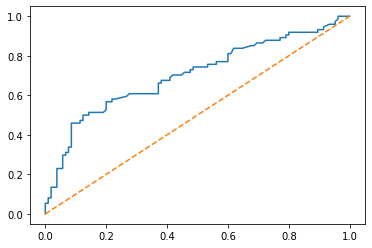

In [48]:
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], [0,1], linestyle="--")
print(sklearn.metrics.auc(false_positive_rate, true_positive_rate))

0.5


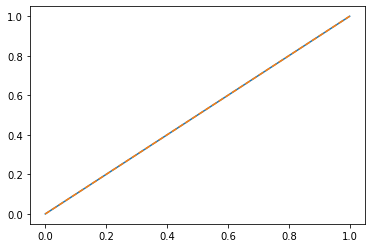

In [49]:
dummy_predicted_probabilities = dummy.predict_proba(Xtest)[:,1]
false_positive_rate, true_positive_rate, thresholds = sklearn.metrics.roc_curve(Ytest, dummy_predicted_probabilities)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], [0,1], linestyle="--")
print(sklearn.metrics.auc(false_positive_rate, true_positive_rate))